In [149]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [150]:
UIC_df = pd.read_csv('../Resources/data/UIC_codes.csv')
UIC_df.sort_values('FIPS').head()

,FIPS,State,County_Name,Population_2010,UIC_2013,Description,City/Suburb/Town/Rural
472,1001,AL,Autauga County,"54,571",2,Small-in a metro area with fewer than 1 millio...,City
473,1003,AL,Baldwin County,"182,265",2,Small-in a metro area with fewer than 1 millio...,City
1762,1005,AL,Barbour County,"27,457",6,Noncore adjacent to a small metro with town of...,Town
0,1007,AL,Bibb County,"22,915",1,Large-in a metro area with at least 1 million ...,City
1,1009,AL,Blount County,"57,322",1,Large-in a metro area with at least 1 million ...,City


In [151]:
UIC_df.dtypes

FIPS                       int64
State                     object
County_Name               object
Population_2010           object
UIC_2013                   int64
Description               object
City/Suburb/Town/Rural    object
dtype: object

In [152]:
UIC_df['Population_2010']=UIC_df['Population_2010'].str.replace(",","").astype('int64')
#UIC_df['Population_2010']=UIC_df['Population_2010'].astype(int,errors='raise')
UIC_df.dtypes


FIPS                       int64
State                     object
County_Name               object
Population_2010            int64
UIC_2013                   int64
Description               object
City/Suburb/Town/Rural    object
dtype: object

In [153]:
unemployment_df = pd.read_csv('../Resources/data/unemployment.csv')
unemployment_df.head()

,FIPS_Code,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,City/Suburb/Town/Rural,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,...,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,1007,AL,"Bibb County, AL",1.0,1.0,City,1.0,"8,623","8,160",463,...,"8,639","8,371",268,3.1,"8,640","8,067",573,6.6,"47,918",92.6
1,1009,AL,"Blount County, AL",1.0,1.0,City,1.0,"25,266","24,375",891,...,"25,196","24,516",680,2.7,"24,661","23,653","1,008",4.1,"52,902",102.2
2,1021,AL,"Chilton County, AL",1.0,1.0,City,1.0,"19,601","18,752",849,...,"19,841","19,296",545,2.7,"19,592","18,618",974,5.0,"49,692",96.0
3,1073,AL,"Jefferson County, AL",1.0,1.0,City,1.0,"331,141","317,868","13,273",...,"316,802","307,648","9,154",2.9,"315,957","296,282","19,675",6.2,"54,127",104.6
4,1115,AL,"St. Clair County, AL",1.0,1.0,City,1.0,"31,555","30,359","1,196",...,"40,698","39,591","1,107",2.7,"40,132","38,146","1,986",4.9,"65,403",126.3


In [154]:
unemployment_df.columns

Index(['FIPS_Code', 'State', 'Area_name', 'Rural_urban_continuum_code_2013',
       'Urban_influence_code_2013', 'City/Suburb/Town/Rural', 'Metro_2013',
       'Civilian_labor_force_2000', 'Employed_2000', 'Unemployed_2000',
       'Unemployment_rate_2000', 'Civilian_labor_force_2001', 'Employed_2001',
       'Unemployed_2001', 'Unemployment_rate_2001',
       'Civilian_labor_force_2002', 'Employed_2002', 'Unemployed_2002',
       'Unemployment_rate_2002', 'Civilian_labor_force_2003', 'Employed_2003',
       'Unemployed_2003', 'Unemployment_rate_2003',
       'Civilian_labor_force_2004', 'Employed_2004', 'Unemployed_2004',
       'Unemployment_rate_2004', 'Civilian_labor_force_2005', 'Employed_2005',
       'Unemployed_2005', 'Unemployment_rate_2005',
       'Civilian_labor_force_2006', 'Employed_2006', 'Unemployed_2006',
       'Unemployment_rate_2006', 'Civilian_labor_force_2007', 'Employed_2007',
       'Unemployed_2007', 'Unemployment_rate_2007',
       'Civilian_labor_force_2008',

In [155]:
droprange = list(range(6,88))
unemployment_df.drop(unemployment_df.columns[droprange],axis =1,inplace=True)
unemployment_df.dropna(axis=0,how='any',inplace=True)

In [156]:
unemployment_df.sort_values('FIPS_Code')

,FIPS_Code,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,City/Suburb/Town/Rural,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
472,1001,AL,"Autauga County, AL",2.0,2.0,City,"24,576","1,262",4.9,"58,233",112.5
473,1003,AL,"Baldwin County, AL",3.0,2.0,City,"91,338","5,425",5.6,"59,871",115.6
1760,1005,AL,"Barbour County, AL",6.0,6.0,Town,"7,982",605,7.0,"35,972",69.5
0,1007,AL,"Bibb County, AL",1.0,1.0,City,"8,067",573,6.6,"47,918",92.6
1,1009,AL,"Blount County, AL",1.0,1.0,City,"23,653","1,008",4.1,"52,902",102.2
...,...,...,...,...,...,...,...,...,...,...,...
2534,56037,WY,"Sweetwater County, WY",5.0,8.0,Town,"19,308","1,532",7.4,"80,639",121.9
2535,56039,WY,"Teton County, WY",7.0,8.0,Town,"14,292",912,6.0,"98,837",149.4
2536,56041,WY,"Uinta County, WY",7.0,8.0,Town,"8,730",582,6.3,"70,756",107.0
3034,56043,WY,"Washakie County, WY",7.0,11.0,Rural,"3,793",211,5.3,"55,122",83.3


In [157]:
#remove County_Name and Description from UIC_df it directly correlates with FIPS
UIC_df=UIC_df.drop(['County_Name','Description'],axis=1)
UIC_df.sort_values(['Population_2010'],ascending=False).head(10)

,FIPS,State,Population_2010,UIC_2013,City/Suburb/Town/Rural
13,6037,CA,9818605,1,City
89,17031,IL,5194675,1,City
350,48201,TX,4092459,1,City
7,4013,AZ,3817117,1,City
21,6073,CA,3095313,1,City
15,6059,CA,3010232,1,City
235,36047,NY,2504700,1,City
48,12086,FL,2496435,1,City
344,48113,TX,2368139,1,City
245,36081,NY,2230722,1,City


In [158]:
#Remove area_name it correlates with FIPS_Code
unemployment_df=unemployment_df.drop('Area_name',axis=1)
unemployment_df

,FIPS_Code,State,Rural_urban_continuum_code_2013,Urban_influence_code_2013,City/Suburb/Town/Rural,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,1007,AL,1.0,1.0,City,"8,067",573,6.6,"47,918",92.6
1,1009,AL,1.0,1.0,City,"23,653","1,008",4.1,"52,902",102.2
2,1021,AL,1.0,1.0,City,"18,618",974,5.0,"49,692",96.0
3,1073,AL,1.0,1.0,City,"296,282","19,675",6.2,"54,127",104.6
4,1115,AL,1.0,1.0,City,"38,146","1,986",4.9,"65,403",126.3
...,...,...,...,...,...,...,...,...,...,...
3212,55099,WI,9.0,12.0,Rural,"5,785",424,6.8,"48,761",76.0
3213,55113,WI,7.0,12.0,Rural,"7,289",621,7.9,"53,908",84.0
3214,55125,WI,9.0,12.0,Rural,"9,480",741,7.2,"55,576",86.6
3215,56003,WY,9.0,12.0,Rural,"5,112",269,5.0,"53,018",80.1


In [159]:
county_merge_df=pd.merge(UIC_df,unemployment_df,how='inner',left_on='FIPS',right_on='FIPS_Code')
county_merge_df=county_merge_df.drop(['State_y','City/Suburb/Town/Rural_y','FIPS_Code','Urban_influence_code_2013','City/Suburb/Town/Rural_x','Rural_urban_continuum_code_2013'],axis=1)
county_merge_df.rename(columns={'State_x':'State'},inplace=True)
county_merge_df['Employed_2020']=county_merge_df['Employed_2020'].str.replace(",","").astype('int64')
county_merge_df['Median_Household_Income_2019']=county_merge_df['Median_Household_Income_2019'].str.replace(",","").astype('int64')
county_merge_df['Unemployed_2020']=county_merge_df['Unemployed_2020'].str.replace(",","").astype('int64')

#UIC_df['Population_2010']=UIC_df['Population_2010'].str.replace(",","").astype('int64')
county_merge_df

,FIPS,State,Population_2010,UIC_2013,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,1007,AL,22915,1,8067,573,6.6,47918,92.6
1,1009,AL,57322,1,23653,1008,4.1,52902,102.2
2,1021,AL,43643,1,18618,974,5.0,49692,96.0
3,1073,AL,658466,1,296282,19675,6.2,54127,104.6
4,1115,AL,83593,1,38146,1986,4.9,65403,126.3
...,...,...,...,...,...,...,...,...,...
3134,55099,WI,14159,12,5785,424,6.8,48761,76.0
3135,55113,WI,16557,12,7289,621,7.9,53908,84.0
3136,55125,WI,21430,12,9480,741,7.2,55576,86.6
3137,56003,WY,11668,12,5112,269,5.0,53018,80.1


In [160]:
county_merge_df.dtypes

FIPS                                           int64
State                                         object
Population_2010                                int64
UIC_2013                                       int64
Employed_2020                                  int64
Unemployed_2020                                int64
Unemployment_rate_2020                       float64
Median_Household_Income_2019                   int64
Med_HH_Income_Percent_of_State_Total_2019    float64
dtype: object

In [161]:
cols_used=county_merge_df.columns
cols_used=cols_used[1:9]
cols_used

Index(['State', 'Population_2010', 'UIC_2013', 'Employed_2020',
       'Unemployed_2020', 'Unemployment_rate_2020',
       'Median_Household_Income_2019',
       'Med_HH_Income_Percent_of_State_Total_2019'],
      dtype='object')

In [162]:
X=county_merge_df[cols_used].copy()

In [163]:
X['State']=LabelEncoder().fit_transform(X['State'])
X.head()


,State,Population_2010,UIC_2013,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,1,22915,1,8067,573,6.6,47918,92.6
1,1,57322,1,23653,1008,4.1,52902,102.2
2,1,43643,1,18618,974,5.0,49692,96.0
3,1,658466,1,296282,19675,6.2,54127,104.6
4,1,83593,1,38146,1986,4.9,65403,126.3


In [164]:
X_scaled=MinMaxScaler().fit_transform(X)
X_scaled

array([[2.00000000e-02, 2.32550252e-03, 0.00000000e+00, ...,
        2.35576923e-01, 1.82460614e-01, 2.70811922e-01],
       [2.00000000e-02, 5.82979741e-03, 0.00000000e+00, ...,
        1.15384615e-01, 2.21681855e-01, 3.20143885e-01],
       [2.00000000e-02, 4.43661435e-03, 0.00000000e+00, ...,
        1.58653846e-01, 1.96420983e-01, 2.88283659e-01],
       ...,
       [9.60000000e-01, 2.17425778e-03, 1.00000000e+00, ...,
        2.64423077e-01, 2.42724712e-01, 2.39979445e-01],
       [1.00000000e+00, 1.18001455e-03, 1.00000000e+00, ...,
        1.58653846e-01, 2.22594709e-01, 2.06577595e-01],
       [1.00000000e+00, 2.44639647e-04, 1.00000000e+00, ...,
        1.00961538e-01, 1.87142925e-01, 1.71634121e-01]])

C:\Users\erict\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  f"KMeans is known to have a memory leak on Windows "


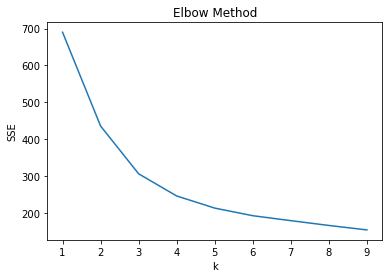

In [165]:
sse = {}
K = range(1, 10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_scaled)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [166]:
# Create a KMeans model with 3 clusters
model = KMeans(n_clusters=4, random_state=42).fit(X_scaled)

In [167]:
y_pred=model.predict(X_scaled)
print(y_pred)

[2 2 2 ... 3 3 3]


In [168]:
df_y=pd.DataFrame(y_pred,columns=['Cluster'])
df_y.head()

,Cluster
0,2
1,2
2,2
3,2
4,2


In [169]:
county_cluster_df=county_merge_df.join(df_y,how='inner')
county_cluster_df.head()

,FIPS,State,Population_2010,UIC_2013,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,Cluster
0,1007,AL,22915,1,8067,573,6.6,47918,92.6,2
1,1009,AL,57322,1,23653,1008,4.1,52902,102.2,2
2,1021,AL,43643,1,18618,974,5.0,49692,96.0,2
3,1073,AL,658466,1,296282,19675,6.2,54127,104.6,2
4,1115,AL,83593,1,38146,1986,4.9,65403,126.3,2


In [170]:
county_cluster_df.dtypes

FIPS                                           int64
State                                         object
Population_2010                                int64
UIC_2013                                       int64
Employed_2020                                  int64
Unemployed_2020                                int64
Unemployment_rate_2020                       float64
Median_Household_Income_2019                   int64
Med_HH_Income_Percent_of_State_Total_2019    float64
Cluster                                        int32
dtype: object

In [171]:
county_cluster_df.describe()

,FIPS,Population_2010,UIC_2013,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,Cluster
count,3139.000000,3.139000e+03,3139.000000,3.139000e+03,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000
mean,30392.532972,9.834921e+04,5.266327,4.704439e+04,4120.106085,6.738229,55726.833705,89.480599,1.428799
std,15156.298611,3.130835e+05,3.498399,1.493367e+05,17048.531628,2.272531,14485.143738,19.830290,1.086278
min,1001.000000,8.200000e+01,1.000000,1.740000e+02,4.000000,1.700000,24732.000000,39.900000,0.000000
25%,18180.000000,1.113500e+04,2.000000,4.510500e+03,294.500000,5.200000,46259.000000,76.450000,0.000000
50%,29177.000000,2.589300e+04,5.000000,1.074600e+04,772.000000,6.500000,53344.000000,86.800000,1.000000
75%,45080.000000,6.693500e+04,8.000000,2.936050e+04,2196.500000,8.000000,62063.000000,99.500000,2.000000
max,56045.000000,9.818605e+06,12.000000,4.291688e+06,629811.000000,22.500000,151806.000000,234.500000,3.000000


In [172]:
county_cluster_df['Cluster'].value_counts().head()

2    887
0    825
1    785
3    642
Name: Cluster, dtype: int64

In [173]:
county_cluster_df.head(10)

,FIPS,State,Population_2010,UIC_2013,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,Cluster
0,1007,AL,22915,1,8067,573,6.6,47918,92.6,2
1,1009,AL,57322,1,23653,1008,4.1,52902,102.2,2
2,1021,AL,43643,1,18618,974,5.0,49692,96.0,2
3,1073,AL,658466,1,296282,19675,6.2,54127,104.6,2
4,1115,AL,83593,1,38146,1986,4.9,65403,126.3,2
5,1117,AL,195085,1,109646,4402,3.9,77801,150.3,2
6,1127,AL,67023,1,23431,1446,5.8,45991,88.8,2
7,4013,AZ,3817117,1,2159267,172361,7.4,68634,110.7,2
8,4021,AZ,375770,1,176674,14400,7.5,62067,100.1,2
9,5035,AR,50902,1,19459,1750,8.3,41976,85.6,2


In [174]:
county_cluster0_df=county_cluster_df.loc[(county_cluster_df["Cluster"]==0)]
county_cluster0_df.head()

,FIPS,State,Population_2010,UIC_2013,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,Cluster
1447,1047,AL,43820,5,13049,1570,10.7,34034,65.7,0
1451,4017,AZ,107449,5,36322,4097,10.1,40676,65.6,0
1457,6033,CA,64665,5,25567,2700,9.6,46897,58.3,0
1464,12027,FL,34862,5,13615,741,5.2,41673,70.4,0
1467,13055,GA,26015,5,8947,820,8.4,41561,67.1,0


In [175]:
county_cluster1_df=county_cluster_df.loc[(county_cluster_df["Cluster"]==1)]

In [176]:
county_cluster2_df=county_cluster_df.loc[(county_cluster_df["Cluster"]==2)]

In [177]:
county_cluster3_df=county_cluster_df.loc[(county_cluster_df["Cluster"]==3)]

In [178]:
output_data_file = "../../../cluster0.csv"

In [179]:
county_cluster0_df.to_csv(output_data_file)

In [180]:
output_data_file = "../../../cluster1.csv"

In [181]:
county_cluster1_df.to_csv(output_data_file)

In [182]:
output_data_file = "../../../cluster2.csv"

In [183]:
county_cluster2_df.to_csv(output_data_file)

In [184]:
output_data_file = "../../../cluster3.csv"

In [185]:
county_cluster3_df.to_csv(output_data_file)

NameError: name 'county_cluster_df3' is not defined

In [ ]:
county_cluster0_df.describe()

In [ ]:
county_cluster1_df.describe()

In [ ]:
county_cluster2_df.describe()

In [ ]:
county_cluster3_df.describe()